In [87]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
from pandas.api.types import is_string_dtype
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import (
    LinearRegression, LogisticRegression, Ridge, BayesianRidge, Lars, LogisticRegression)

sns.set()

In [88]:
df = pd.read_csv('data/responses.csv')
df = df.fillna(-1.0)
df.shape

(1010, 150)

### Mapping dataframe to numeric values

In [89]:
def map_data_to_numeric_values(df):
  replace_dict = {}
  for col in df.columns:
    if is_string_dtype(df[col]):
      unique_values = df[col].unique()
      replace_dict[col] = dict(zip(unique_values, range(len(unique_values))))
  return df.replace(replace_dict)

df = map_data_to_numeric_values(df)
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,4.0,1,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,0,0,0,1,1,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,0,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,0,0,1,0,0,1


### Choosing Linear model we want to use

In [90]:
models = {
  'Linear Regression': LinearRegression(),
  'Ridge': Ridge(),
  'BayesianRidge': BayesianRidge(),
  'Lars': Lars(),
  # 'LogisticRegression': LogisticRegression() - Limit of iterations was reached
}   

In [91]:
def check_mean_linear_regression_score(dataframe, data_cols, target_cols, model):
  """
  function return a vector of mean scores using passed model
  we try to predict wach column from target_cols using data from data_cols
  """
  data = df[data_cols]
  mean_scores = []
  for target_col in target_cols:
    scores = cross_val_score(model, data, df[target_col], cv=5)
    mean_scores.append(np.mean(scores))
  return np.array(mean_scores)

In [92]:
categories = {}

categories['Music'] = df.columns[range(19)]
categories['Movies'] = df.columns[range(19,31)]
categories['Hobbies'] = df.columns[range(31,63)]
categories['Phobias'] = df.columns[range(63,73)]
categories['Health'] = df.columns[range(73,76)]
categories['Personality'] = df.columns[range(76,133)]
categories['Habits'] = df.columns[range(133,140)]
categories['Demographics'] = df.columns[range(140,150)]

### Heatmaps
We will check what is the mean score if we try to predict each columns using one category as a data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


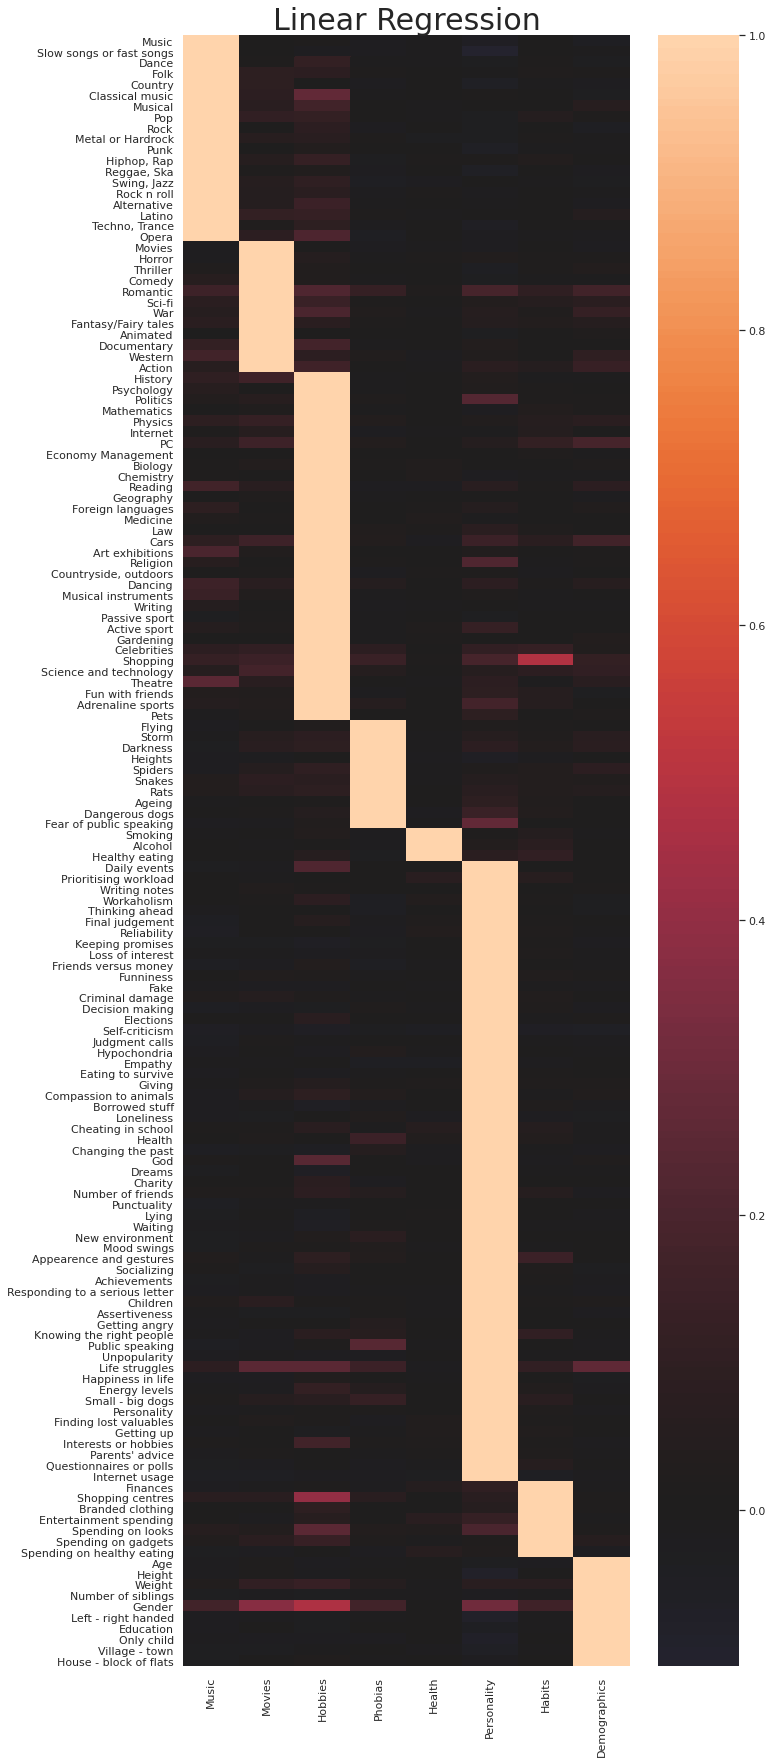

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


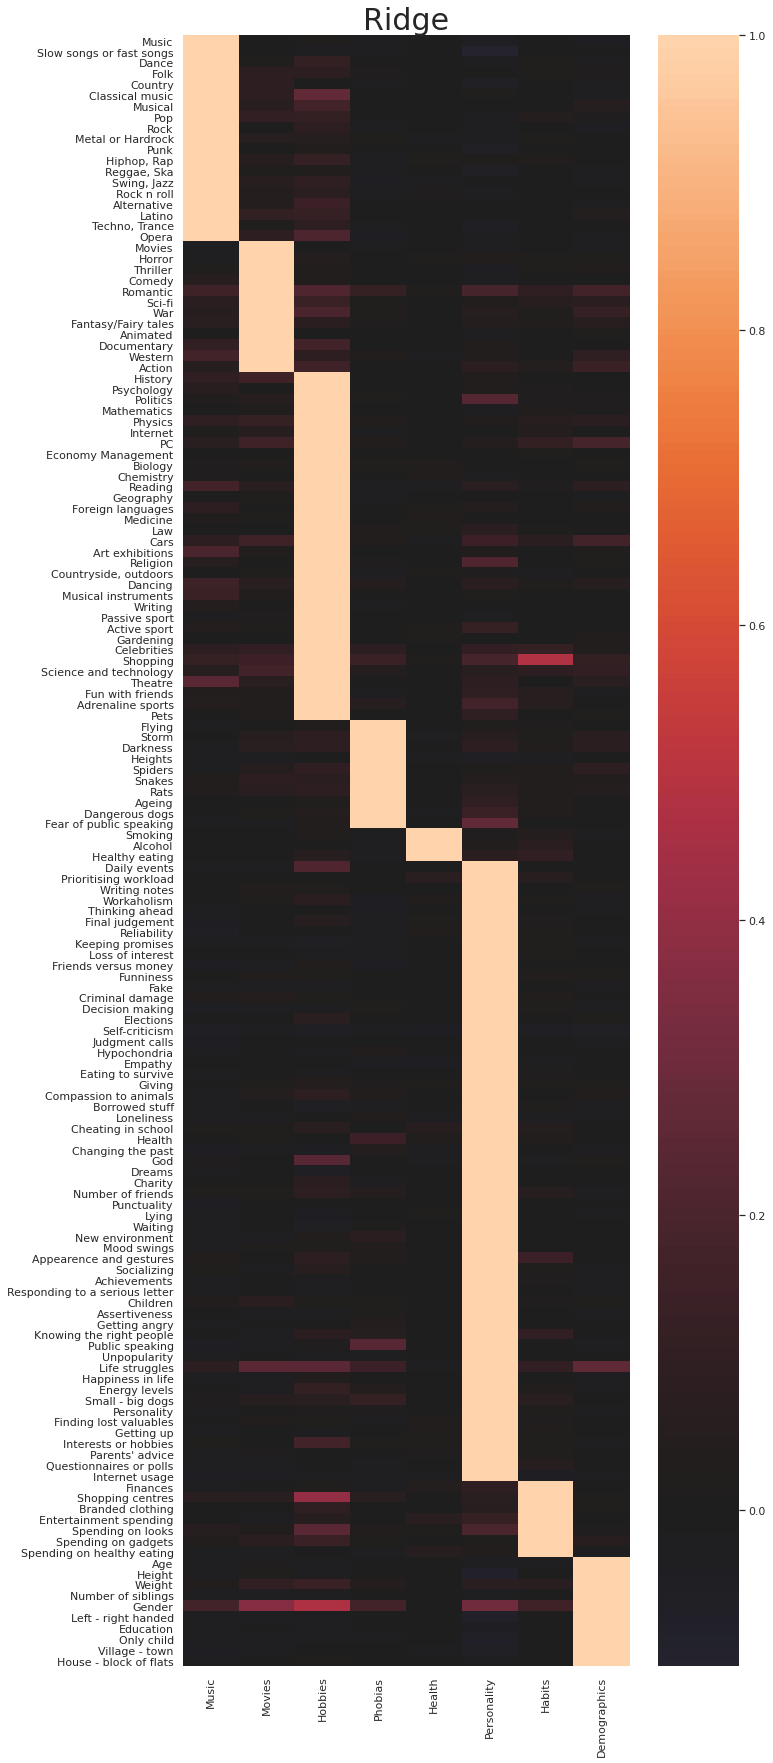

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


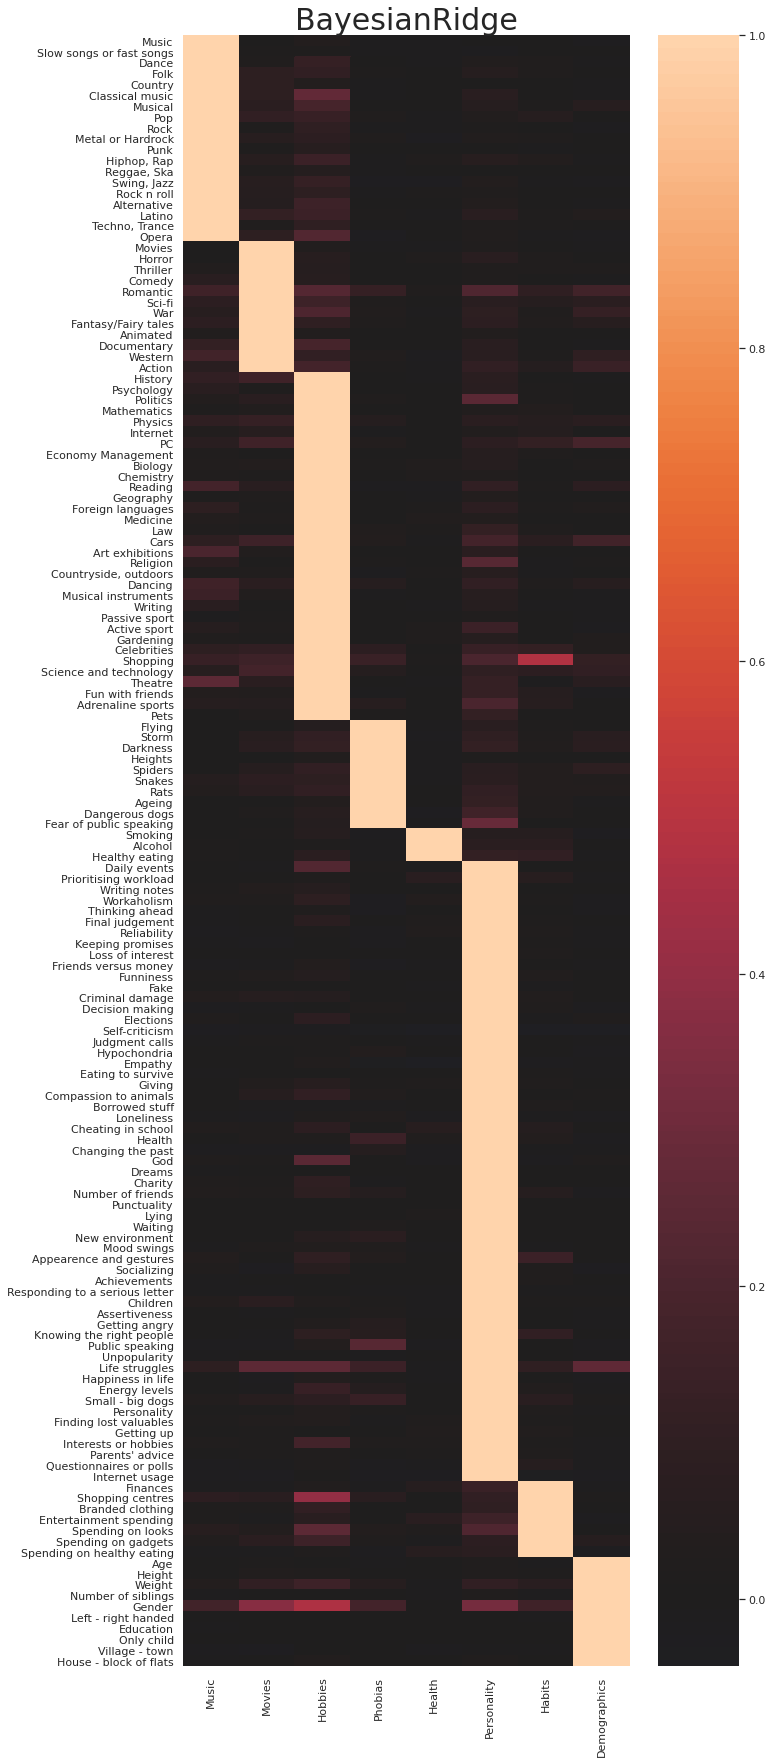

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


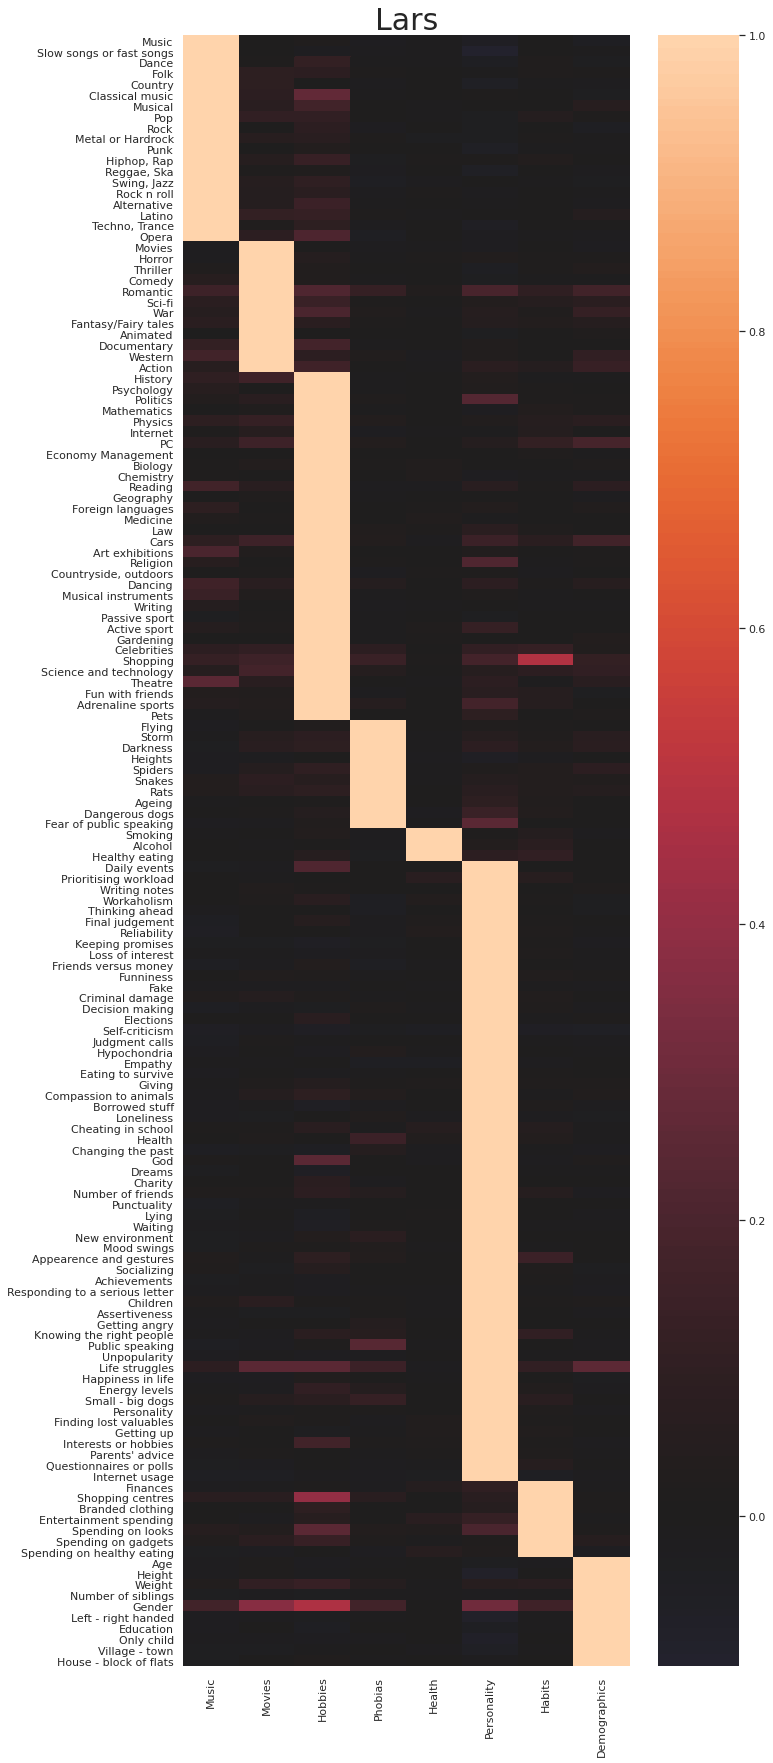

In [96]:
for model_name, model in models.items():
  mean_scores_matrix = np.vstack(
    (check_mean_linear_regression_score(df, cat_cols, df.columns, model) for cat_cols in categories.values())).T
  fig, ax = plt.subplots(figsize=(10,30))
  sns.heatmap(mean_scores_matrix, xticklabels=categories.keys(), yticklabels=df.columns, center=0, ax=ax)
  plt.title(model_name, fontsize=30)
  plt.show()

### Conclusions
* Shopping is strongly correlated with Habits because habbits include very similar columns 'Shoping centers', 'Spending on looks'.
* Basing on almost every category (except of Health) we can make a good guess about gender
* We can see that predictions about music are the best when we base on thata from hobbies
* there are some other more interesting 'lighter rectangles': 
  * Demographics -> Life Struggles
  * Personality -> Fear of public speaking, Politics
  * Hobbies -> God

Of course these result are far from a good clasifiers scores, but they give us knowledge in which direction we can go. Maybe if we change some parameters of linear models we can achive a better solution.

